# Point source on top  of a halfspace

**Overview:** We are going to play with the solutions for a concentrated force located at $(0,0,0)$. Positive $z$ is inside the medium.

In [1]:
from __future__ import division
from sympy import *
from sympy import symbols
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x, y, z, r, E, nu, Fx, Fy, Fz = symbols('x y z r E nu F1 F2 F3')
init_printing()

In [2]:
ux = (1+nu)/(2*pi*E)*((x*z/r**3 - (1-2*nu)*x/(r*(r+z)))*Fz + (2*(1-nu)*r+z)/(r*(r+z))*Fx + ((2*r*(nu*r + z) + z**2)*x)/(r**3*(r+z)**2)*(x*Fx + y*Fy))
uy = (1+nu)/(2*pi*E)*((y*z/r**3 - (1-2*nu)*y/(r*(r+z)))*Fz + (2*(1-nu)*r+z)/(r*(r+z))*Fy + ((2*r*(nu*r + z) + z**2)*y)/(r**3*(r+z)**2)*(x*Fx + y*Fy))
uz = (1+nu)/(2*pi*E)*((2*(1-2*nu)/r + z**2/r**3)*Fz + (((1-2*nu)/(r*(r+z)) + z/r**3)*y)*(x*Fx + y*Fy))

Withouth loss of generality we can assume that $F_y=0$, this is equivalent a rotate the axes until the force is in the plane $y=0$.

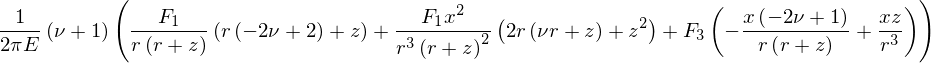

In [3]:
ux = ux.subs(Fy, 0)
ux

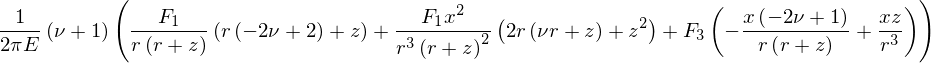

In [4]:
uy = ux.subs(Fy, 0)
uy

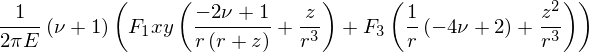

In [5]:
uz = uz.subs(Fy, 0)
uz

The displacement vector is then

In [6]:
u = Matrix([ux, uy, uz])

Let us check if the displacement vanish when $x,y,z \rightarrow \infty$

In [7]:
rdef = sqrt(x**2 + y**2 + z**2)
for k in range(3):
    print limit(u[k].subs(r, rdef), x, oo), limit(u[k].subs(r, rdef), y, oo), limit(u[k].subs(r, rdef), z, oo)

0 0 0
0 0 0
0 0 0


In [8]:
def sym_grad(u, x):
    """Compute the symmetric gradient of u wrt to x"""
    return Matrix(3, 3, lambda i,j:
                  S(1)/2*(diff(u[i], x[j]) + diff(u[j], x[i])))


def strain_to_stress(e, E, nu):
    """Strain to stress relation (Hooke's law)"""
    lamda = E*nu/(1 + nu)/(1 - 2*nu)
    mu = E/2/(1 + nu)
    delta = eye(3)
    return Matrix(3, 3, lambda i,j: 
       lamda*(e[0,0] + e[1,1] + e[2,2])*delta[i,j] + 2*mu*e[i,j])

In [9]:
e = sym_grad(u, [x,y,z])

In [10]:
sigma = strain_to_stress(e, E, nu)

Let us check if the strains and stress components vanish when $x,y,z \rightarrow \infty$

In [11]:
for row in range(3):
    for col in range(3):
        print limit(e[row, col].subs(r, rdef), x, oo), limit(e[row, col].subs(r, rdef), y, oo),
        print limit(e[row, col].subs(r, rdef), z, oo)

0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0


In [12]:
for row in range(3):
    for col in range(3):
        print limit(sigma[row, col].subs(r, rdef), x, oo), limit(sigma[row, col].subs(r, rdef), y, oo),
        print limit(sigma[row, col].subs(r, rdef), z, oo)

0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0


## Visualization of the fields

In [13]:
umag = sqrt((u.T*u)[0]).subs(r, rdef)

In [14]:
umag_num = lambdify((x, y, z, E, nu, Fx, Fz), umag, "numpy") 

In [35]:
x_vec, z_vec = np.mgrid[-1:1:100j, 0:2:100j]

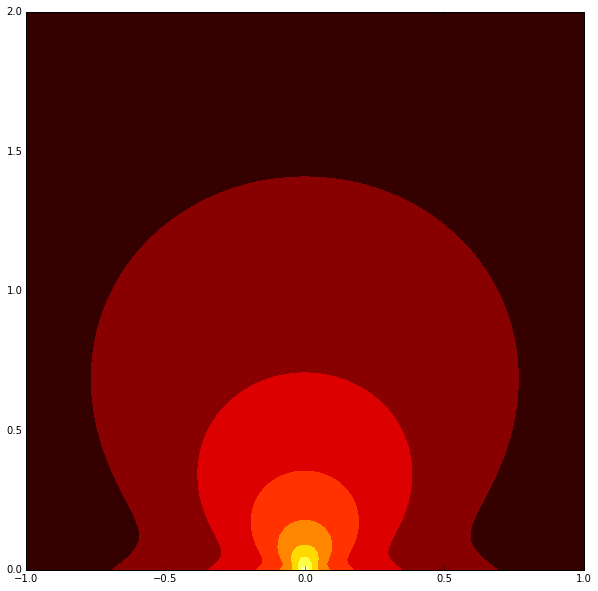

In [36]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.contourf(x_vec, z_vec, np.log10(umag_num(x_vec, 0, z_vec, 1, 1/3, 0, 1)), cmap="hot")

plt.show()